<a href="https://colab.research.google.com/github/Priyanshu7tiwary/ML/blob/main/imageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

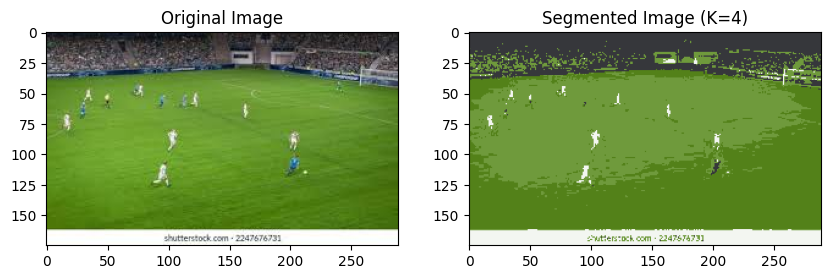

In [11]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


image = cv2.imread('/content/images.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float for K-means


K =4
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixel_values)

# Step 4: Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 5: Reconstruct the segmented image
segmented_image = centroids[labels].reshape(image.shape)
segmented_image = np.uint8(segmented_image)

# Step 6: Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title(f'Segmented Image (K={K})')
plt.imshow(segmented_image)

plt.show()